# <span style = "color:IndianRed; font-size:40px"> Hurricane Classification </span>

***

## Let's Begin

### Import necessary libraries

In [6]:
import pandas as pd 
import numpy as np #array processing 
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #image processing
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from skimage. transform import resize
from sklearn.utils import shuffle
import glob

### Fetch the training Data

In [8]:
pwd

'C:\\Users\\DELL\\Edure Data Science\\06_Deep learning\\14_Capstone project\\hurricane project'

#### Use glob

In [10]:
damage= glob.glob('test/damage/*.jpeg')
no_damage= glob.glob('test/no_damage/*.jpeg')

In [11]:
len(damage)

1000

In [12]:
len(no_damage)

1000

### Fetch the testing data

In [14]:
damage_test= glob.glob('test_another/damage/*.jpeg')
no_damage_test= glob.glob('test_another/no_damage/*.jpeg')

In [15]:
len(damage_test)

1000

In [16]:
len(no_damage_test)

1000

### Find the number of images of all classes in the Training set

In [18]:
print (f'Number of images in Training set are:')
print (f'damage: = {len(damage)}')
print (f'no_damage: = {len(no_damage)}')

Number of images in Training set are:
damage: = 1000
no_damage: = 1000


### Find the number of images of all classes in the testing set

In [20]:
print (f'Number of images in testing set are:')
print (f'damage_test: = {len(damage_test)}')
print (f'no_damage_test: = {len(no_damage_test)}')

Number of images in testing set are:
damage_test: = 1000
no_damage_test: = 1000


### Store all the images inside a list and create a list with the corresponding labels

### For Training set

In [23]:
image = []
label = []

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

### For Testing set

In [25]:
image_test = []
label_test = []

for i in damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in no_damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

### Shuffle both image list and label list (In both Training and testing set)

#### Use shuffle function from sklearn utils

In [28]:
# Train shuffle
image, label = shuffle(image, label, random_state=100)

In [29]:
# Test shuffle
image_test, label_test = shuffle(image_test, label_test, random_state=100)

In [1]:
#image_test

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

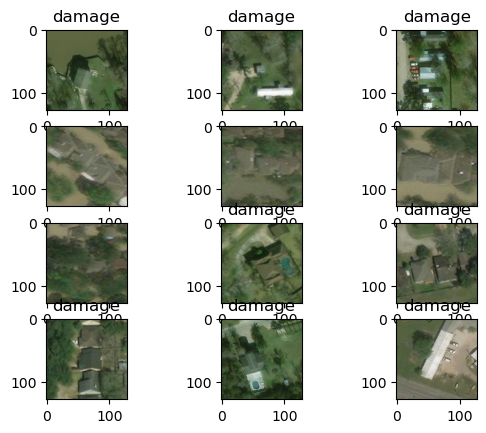

In [32]:
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('damage')
    elif label[i] == 2:
        plt.title('no_damage')
        plt.tight_layout()
        plt.axis='off'

### Check the shape of the first 10 images in our list (Either from training or test set)

In [34]:
for i in range(10):
    print(image[i].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


### Reshape the images to 224x224( For both training and testing set)

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [37]:
xtrain = []
for i in image:
    xtrain.append(resize(i,(224,224,3)))
xtrain = np.array(xtrain)

xtest = []
for i in image_test:
    xtest.append(resize(i,(224,224,3)))
xtest = np.array(xtest)

In [38]:
xtrain

array([[[[0.36862745, 0.4       , 0.25490196],
         [0.36862745, 0.4       , 0.25490196],
         [0.36862745, 0.4       , 0.25490196],
         ...,
         [0.3170068 , 0.37190876, 0.26994798],
         [0.31188475, 0.36678671, 0.26482593],
         [0.31060424, 0.3655062 , 0.26354542]],

        [[0.36862745, 0.4       , 0.25490196],
         [0.36862745, 0.4       , 0.25490196],
         [0.36862745, 0.4       , 0.25490196],
         ...,
         [0.30892357, 0.36382553, 0.26186475],
         [0.30188075, 0.35678271, 0.25482193],
         [0.30012005, 0.35502201, 0.25306122]],

        [[0.36862745, 0.4       , 0.25490196],
         [0.36862745, 0.4       , 0.25490196],
         [0.36862745, 0.4       , 0.25490196],
         ...,
         [0.27659064, 0.3314926 , 0.22953181],
         [0.26186475, 0.31676671, 0.21480592],
         [0.25818327, 0.31308523, 0.21112445]],

        ...,

        [[0.08823529, 0.14313725, 0.08263305],
         [0.08767507, 0.14257703, 0.08095238]

### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [40]:
y_train = np.array(label)
y_test = np.array(label_test)

In [41]:
xtest

array([[[[0.36862745, 0.39607843, 0.26582633],
         [0.36862745, 0.39607843, 0.26526611],
         [0.36862745, 0.39607843, 0.26302521],
         ...,
         [0.24431773, 0.28353341, 0.14711885],
         [0.21790716, 0.25712285, 0.12070828],
         [0.21130452, 0.25052021, 0.11410564]],

        [[0.36862745, 0.39607843, 0.26582633],
         [0.36862745, 0.39607843, 0.26526611],
         [0.36862745, 0.39607843, 0.26302521],
         ...,
         [0.24995998, 0.28917567, 0.15332133],
         [0.22386955, 0.26308523, 0.12723089],
         [0.21734694, 0.25656263, 0.12070828]],

        [[0.36862745, 0.39607843, 0.26582633],
         [0.36862745, 0.39607843, 0.26526611],
         [0.36862745, 0.39607843, 0.26302521],
         ...,
         [0.27252901, 0.3117447 , 0.17813125],
         [0.24771909, 0.28693477, 0.15332133],
         [0.24151661, 0.28073229, 0.14711885]],

        ...,

        [[0.41404562, 0.51208483, 0.35522209],
         [0.40828331, 0.50632253, 0.34945978]

### Plot some of our reshaped images

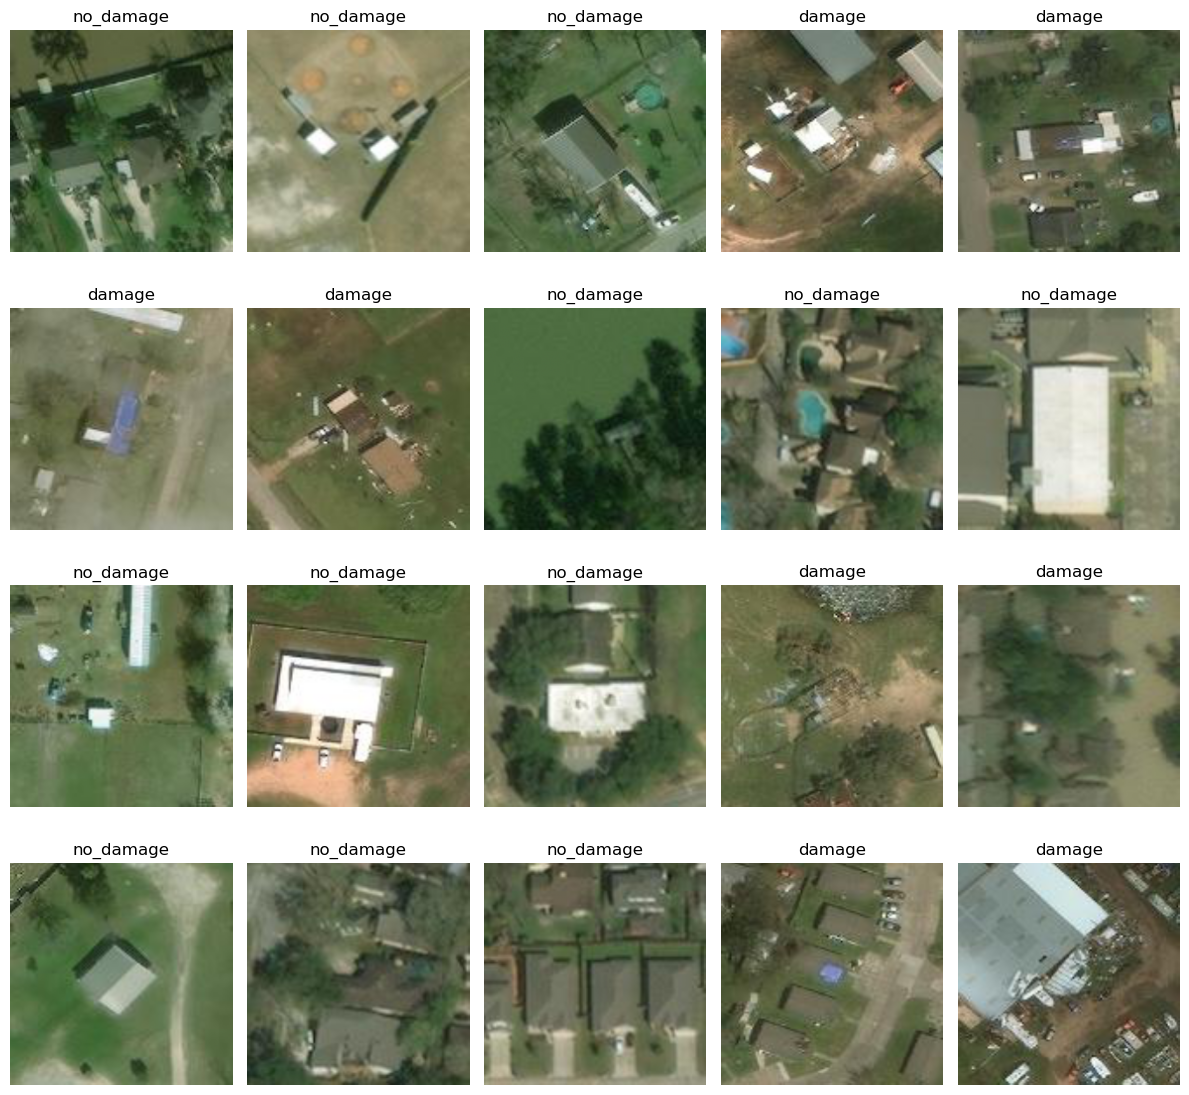

In [43]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
    if  label_test[i]==0:
        plt.title('damage')
    elif label_test[i]==1:
        plt.title('no_damage')
    plt.axis('off')
    plt.tight_layout()

### Check the shape of X_train and X_test and y_train and y_test

In [45]:
print(f'shape of xtrain{xtrain.shape}')
print(f'shape of xtest{xtest.shape}')
print(f'shape of ytrain{y_train.shape}')
print(f'shape of ytest{y_test.shape}')

shape of xtrain(2000, 224, 224, 3)
shape of xtest(2000, 224, 224, 3)
shape of ytrain(2000,)
shape of ytest(2000,)


### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [47]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (224,224,3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

#### Use 'sparse_categorical_crossentropy' for loss

In [50]:
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

### Check the summary of our model

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      25,233,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,236,481 (96.27 MB)

 Trainable params: 25,236,481 (96.27 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model. 
Make sure to include a validation data with validation_split

In [102]:
model.fit(xtest,y_test,epochs=9,validation_split=0.1)

Epoch 1/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 738ms/step - accuracy: 0.6782 - loss: 1.4202 - val_accuracy: 0.8100 - val_loss: 0.4034
Epoch 2/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 698ms/step - accuracy: 0.8280 - loss: 0.4069 - val_accuracy: 0.8800 - val_loss: 0.3331
Epoch 3/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 602ms/step - accuracy: 0.8943 - loss: 0.2752 - val_accuracy: 0.8600 - val_loss: 0.3689
Epoch 4/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 591ms/step - accuracy: 0.8846 - loss: 0.2898 - val_accuracy: 0.7500 - val_loss: 0.4866
Epoch 5/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 587ms/step - accuracy: 0.9033 - loss: 0.2309 - val_accuracy: 0.8750 - val_loss: 0.3730
Epoch 6/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 593ms/step - accuracy: 0.9113 - loss: 0.1989 - val_accuracy: 0.8850 - val_loss: 0.3136
Epoch 7/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 584ms/step - accuracy: 0.9598 - loss: 0.1226 - val_accuracy: 0.9000 - val_loss: 0.2923
Epoch 8/9
57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 662ms/step - accuracy: 0.9694 - loss: 0.0880 - val_accuracy: 0.

### Evaluate the model

In [130]:
model.evaluate(xtest,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9920 - loss: 0.0406


[0.06515204161405563, 0.9829999804496765]

### Make predictions with X_test

In [132]:
prediction = model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step


In [133]:
pred = [1 if i>.5 else 0 for i in prediction]

In [3]:
#pred

### Plot X_test with label from our prediction

In [139]:
pred_list = {
 0: 'damage',
 1: 'no_damage',
 
}
values = pred_list
values

{0: 'damage', 1: 'no_damage'}

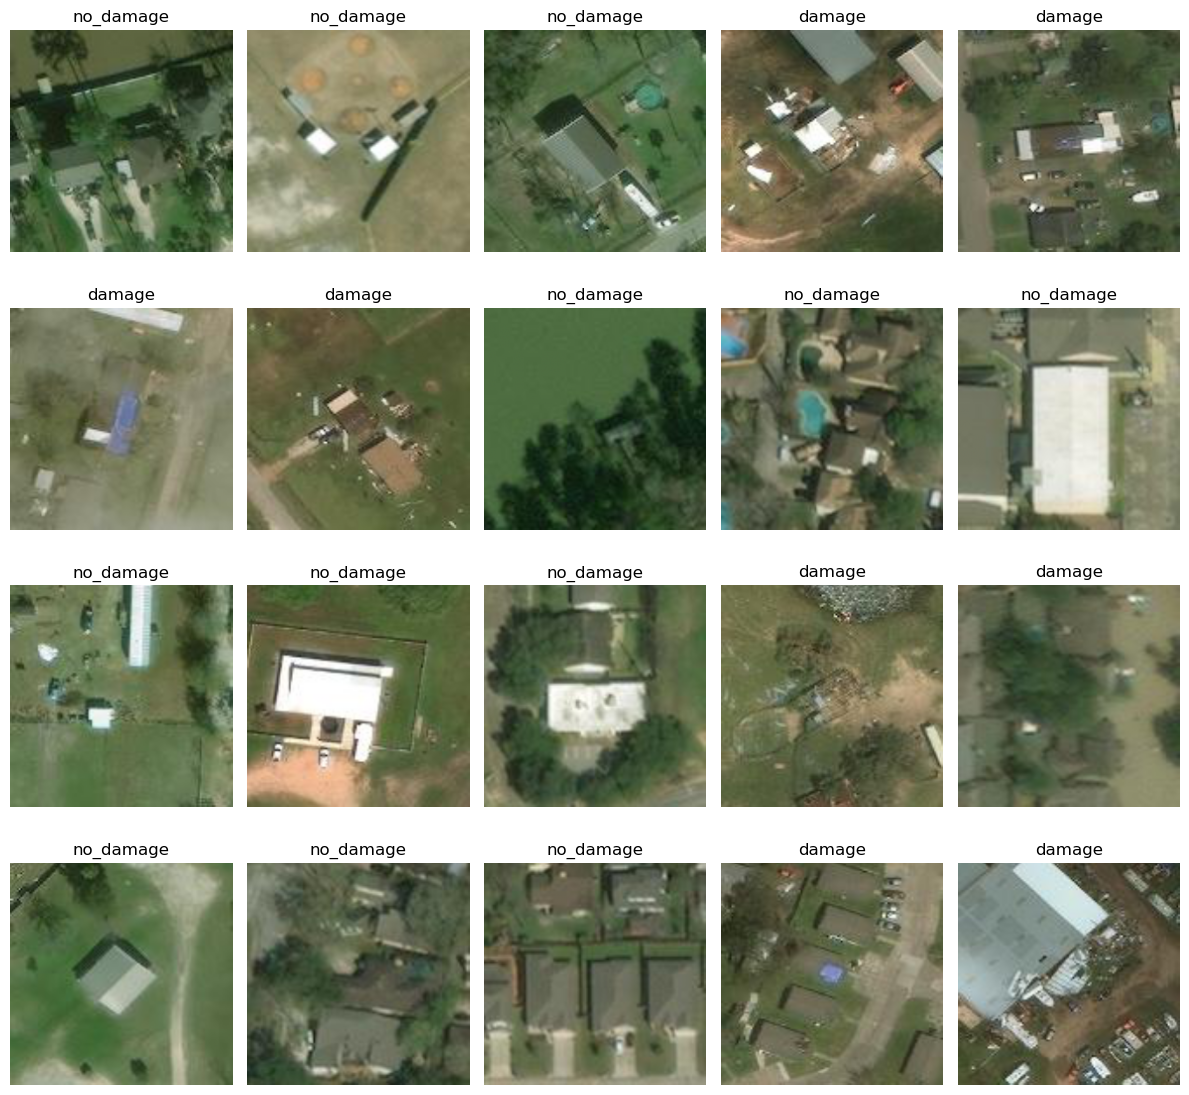

In [141]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
    plt.title(values[pred[i]])
    plt.axis('off')
    plt.tight_layout()

### Visualise confusion matrix on a heatmap

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<Axes: >

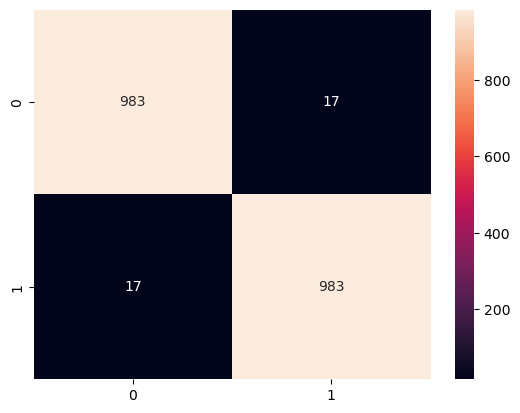

In [146]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='d')

In [148]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



***

# <span style = "color:green;font-size:50px">Great Job!</span>